In [48]:
from bs4 import BeautifulSoup
import re
import requests
import operator
import pickle
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

In [3]:
file_base = %pwd
file_base += "/cve-data/"
file_base

'/Users/bala/Desktop/227/code/CSE-227/cve-data/'

In [4]:
CVE_IDS = []
file = "download ("
for i in range(0,29):
    file_path = file_base + file + str(i) + ").tsv"
    with open(file_path) as f:
        contents = f.readlines()
        for line in contents[1:]:
            words = line.split('\t')
            CVE_IDS.append(words[1])

In [5]:
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol=2)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [20]:
CVE_TO_BUGID = load_obj("cve_to_bugzilla_links")
CVE_TO_DATE = load_obj("cve_to_bugzilla_date")

In [14]:
CVE_TO_MAXATTACHMENTDATE = {}

for key_cve, value_bugs in CVE_TO_BUGID.items():
    print(key_cve, len(value_bugs))
    main_date = None
    for bug in value_bugs:
        s_url = bug
        s_hdr = {'User-Agent': 'Mozilla/5.0'}
        s_html = requests.get(s_url)
        soupBugzilla = BeautifulSoup(s_html.text, "html.parser")
        
        endDate = soupBugzilla.find("span", attrs={"id": "field-value-delta_ts"})
        if endDate != None:
            endDate = endDate.find("span", attrs={"class": "rel-time"})["title"].strip()	
            end_datetime = datetime.strptime(endDate, '%Y-%m-%d %H:%M %Z')
        else:
            end_datetime = None
        #print end_datetime
        h = soupBugzilla.find("table", attrs={"id" : "attachments"})
        if h != None:
            temp = h.find_all('span', attrs={"class": "rel-time"})
            maxDate = datetime.strptime(temp[0]["title"], '%Y-%m-%d %H:%M %Z')
            for s in temp:
                attach_datetime = datetime.strptime(s["title"], '%Y-%m-%d %H:%M %Z')
                if attach_datetime > maxDate:
                    maxDate = attach_datetime
            end_datetime = maxDate
            
        if end_datetime == None:
            continue
        if main_date == None:
            main_date = end_datetime
        else:
            main_date = max(main_date, end_datetime)
            
    CVE_TO_MAXATTACHMENTDATE[key_cve] = main_date
        
        

CVE-2016-5284 1
CVE-2016-5283 1
CVE-2016-5282 1
CVE-2016-5281 1
CVE-2016-5280 1
CVE-2016-5279 1
CVE-2016-5278 1
CVE-2016-5277 1
CVE-2016-5276 1
CVE-2016-5275 1
CVE-2016-5274 1
CVE-2016-5273 1
CVE-2016-5272 1
CVE-2016-5271 1
CVE-2016-5270 1
CVE-2016-5268 1
CVE-2016-5267 1
CVE-2016-5266 1
CVE-2016-5265 1
CVE-2016-5264 1
CVE-2016-5263 1
CVE-2016-5262 1
CVE-2016-5261 1
CVE-2016-5260 1
CVE-2016-5259 1
CVE-2016-5258 1
CVE-2016-5257 9
CVE-2016-5256 7
CVE-2016-5255 1
CVE-2016-5254 1
CVE-2016-5253 1
CVE-2016-5252 1
CVE-2016-5251 1
CVE-2016-5250 1
CVE-2016-2839 1
CVE-2016-2838 1
CVE-2016-2837 1
CVE-2016-2836 8
CVE-2016-2835 9
CVE-2016-2834 4
CVE-2016-2833 1
CVE-2016-2832 1
CVE-2016-2831 1
CVE-2016-2830 1
CVE-2016-2829 1
CVE-2016-2828 1
CVE-2016-2827 1
CVE-2016-2826 1
CVE-2016-2825 1
CVE-2016-2824 1
CVE-2016-2822 1
CVE-2016-2821 1
CVE-2016-2820 1
CVE-2016-2819 1
CVE-2016-2818 13
CVE-2016-2817 1
CVE-2016-2816 1
CVE-2016-2815 6
CVE-2016-2814 1
CVE-2016-2813 1
CVE-2016-2812 1
CVE-2016-2811 1
CVE-201

CVE-2013-0795 1
CVE-2013-0794 1
CVE-2013-0793 1
CVE-2013-0792 1
CVE-2013-0791 1
CVE-2013-0790 1
CVE-2013-0789 13
CVE-2013-0788 10
CVE-2013-0787 1
CVE-2013-0784 12
CVE-2013-0783 10
CVE-2013-0782 1
CVE-2013-0781 1
CVE-2013-0780 1
CVE-2013-0779 1
CVE-2013-0778 1
CVE-2013-0777 1
CVE-2013-0776 1
CVE-2013-0775 1
CVE-2013-0774 1
CVE-2013-0773 1
CVE-2013-0772 1
CVE-2013-0771 1
CVE-2013-0770 4
CVE-2013-0769 5
CVE-2013-0768 1
CVE-2013-0767 1
CVE-2013-0766 1
CVE-2013-0765 1
CVE-2013-0764 1
CVE-2013-0763 1
CVE-2013-0762 1
CVE-2013-0761 1
CVE-2013-0760 1
CVE-2013-0759 1
CVE-2013-0758 1
CVE-2013-0757 1
CVE-2013-0756 1
CVE-2013-0755 1
CVE-2013-0754 1
CVE-2013-0753 1
CVE-2013-0752 1
CVE-2013-0751 1
CVE-2013-0750 1
CVE-2013-0749 9
CVE-2013-0748 1
CVE-2013-0747 1
CVE-2013-0746 1
CVE-2013-0745 1
CVE-2013-0744 1
CVE-2012-5843 14
CVE-2012-5842 5
CVE-2012-5841 1
CVE-2012-5840 1
CVE-2012-5839 1
CVE-2012-5838 1
CVE-2012-5837 1
CVE-2012-5836 1
CVE-2012-5835 1
CVE-2012-5833 1
CVE-2012-5830 1
CVE-2012-5829 1
CVE

CVE-2009-0356 1
CVE-2009-0355 1
CVE-2009-0354 1
CVE-2009-0353 1
CVE-2009-0352 11
CVE-2009-0071 3
CVE-2008-7293 1
CVE-2008-5913 1
CVE-2008-5512 2
CVE-2008-5511 2
CVE-2008-5510 1
CVE-2008-5508 2
CVE-2008-5507 1
CVE-2008-5506 1
CVE-2008-5505 1
CVE-2008-5504 1
CVE-2008-5503 1
CVE-2008-5502 1
CVE-2008-5501 1
CVE-2008-5500 2
CVE-2008-5052 1
CVE-2008-5024 1
CVE-2008-5023 1
CVE-2008-5022 1
CVE-2008-5021 1
CVE-2008-5019 1
CVE-2008-5018 1
CVE-2008-5017 1
CVE-2008-5016 1
CVE-2008-5015 1
CVE-2008-5014 1
CVE-2008-5013 1
CVE-2008-5012 2
CVE-2008-4582 1
CVE-2008-4069 1
CVE-2008-4067 2
CVE-2008-4066 1
CVE-2008-4065 1
CVE-2008-4064 3
CVE-2008-4063 3
CVE-2008-4062 3
CVE-2008-4061 1
CVE-2008-4060 2
CVE-2008-4059 1
CVE-2008-4058 2
CVE-2008-3837 1
CVE-2008-3836 2
CVE-2008-3835 1
CVE-2008-3444 1
CVE-2008-3198 1
CVE-2008-2934 1
CVE-2008-2933 1
CVE-2008-2811 1
CVE-2008-2810 1
CVE-2008-2809 3
CVE-2008-2808 1
CVE-2008-2807 1
CVE-2008-2806 1
CVE-2008-2805 1
CVE-2008-2803 1
CVE-2008-2802 1
CVE-2008-2801 3
CVE-200

In [18]:
for key_cve, value_maxdate in CVE_TO_MAXATTACHMENTDATE.items():
    if key_cve in CVE_TO_DATE:
        print(CVE_TO_DATE[key_cve], value_maxdate)

2016-09-15 12:14:00 2016-09-21 15:54:00
2013-10-17 17:04:00 2017-02-09 07:55:00
2013-10-29 08:44:00 2016-05-23 21:56:00
2016-07-05 16:16:00 2016-07-26 10:04:00
2016-07-27 19:54:00 2016-08-12 16:18:00
2016-02-18 20:14:00 2016-04-29 12:31:00
2016-08-12 05:55:00 2016-08-18 14:17:00
2016-08-03 04:48:00 2016-08-16 19:54:00
2016-07-19 02:02:00 2016-08-23 11:40:00
2016-07-17 01:32:00 2016-08-26 08:52:00
2016-06-24 07:10:00 2016-09-21 23:46:00
2016-06-16 02:42:00 2017-03-29 00:49:00
2016-08-24 21:36:00 2016-08-25 15:37:00
2016-07-23 22:40:00 2016-08-16 12:03:00
2016-08-01 14:02:00 2016-08-23 19:46:00
2016-03-04 10:27:00 2016-04-14 09:04:00
2016-07-04 19:42:00 2016-07-06 05:11:00
2015-11-22 11:03:00 2016-04-19 12:20:00
2016-06-03 18:06:00 2016-06-22 08:20:00
2016-07-12 01:33:00 2016-07-14 16:48:00
2016-05-31 05:05:00 2016-05-31 18:32:00
2016-06-02 00:56:00 2016-06-08 05:16:00
2016-07-16 03:33:00 2016-07-20 05:05:00
2016-06-15 10:02:00 2016-06-29 13:42:00
2016-06-28 18:24:00 2016-06-30 20:23:00


2011-05-05 11:41:00 2011-09-19 12:25:00
2011-05-15 19:16:00 2011-05-19 07:30:00
2011-07-20 07:10:00 2011-07-21 15:24:00
2011-05-09 00:30:00 2011-06-23 19:23:00
2011-06-17 05:45:00 2011-12-05 05:14:00
2011-07-25 13:38:00 2011-07-28 13:17:00
2011-06-21 09:56:00 2011-06-29 17:05:00
2011-06-21 09:47:00 2011-06-23 08:37:00
2011-05-09 14:27:00 2011-10-05 08:28:00
2011-03-31 07:10:00 2011-07-25 16:05:00
2010-06-15 08:32:00 2011-08-01 15:04:00
2011-01-16 18:00:00 2011-04-15 16:46:00
2010-01-21 16:20:00 2011-07-27 16:00:00
2010-11-22 19:31:00 2011-11-09 15:21:00
2011-03-17 09:07:00 2011-07-19 12:26:00
2011-03-18 17:21:00 2011-05-10 16:49:00
2011-04-06 11:54:00 2011-07-22 18:52:00
2011-03-01 22:49:00 2011-06-13 23:45:00
2011-02-18 07:10:00 2011-05-16 15:20:00
2010-09-16 13:11:00 2013-12-27 14:34:00
2011-01-16 13:54:00 2011-06-09 09:30:00
2010-12-06 20:17:00 2011-03-06 07:46:00
2011-05-16 13:56:00 2011-09-30 14:30:00
2011-06-13 16:06:00 2011-06-15 12:58:00
2011-03-28 08:09:00 2011-03-30 11:30:00


In [22]:
save_obj(CVE_TO_MAXATTACHMENTDATE, "cve_to_maxattachment_date")

In [10]:
CVE_BUGZILLA_DATE = load_obj("cve_to_bugzilla_date")
CVE_TO_MAXATTACHMENTDATE = load_obj("cve_to_maxattachment_date")

In [19]:
# bucketing for patch times
year_bucket = {}
for cve_key, value_date in CVE_TO_MAXATTACHMENTDATE.items():
    if cve_key in CVE_BUGZILLA_DATE:
        earliest_date = CVE_BUGZILLA_DATE[cve_key]
        diff = value_date - earliest_date
        noOfDays = round((diff.total_seconds())/(24*3600*30))
        temp_year = min(int(cve_key.split("-")[1]), earliest_date.year)
        if temp_year in year_bucket:
            year_bucket[temp_year].append(noOfDays)
        else:
            year_bucket[temp_year] = [noOfDays]


In [66]:
patch_bucket = [[],[]]
for key,value in year_bucket.items():
    if key >= 2011 and key <= 2016:
        patch_bucket[0] += value
    else:
        if key <= 2005:
            continue
        patch_bucket[1] += value

rapidRelease = np.mean(patch_bucket[0])
normalRelease = np.mean(patch_bucket[1])

print(rapidRelease, normalRelease)

3.0584498094 6.30973451327


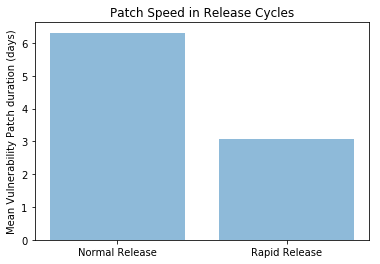

In [68]:
objects = ('Normal Release', 'Rapid Release')
y_pos = np.arange(len(objects))
performance = [normalRelease,rapidRelease]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Vulnerability Patch duration (days)')
plt.title('Patch Speed in Release Cycles')
 
plt.show()

In [35]:
years = []
mean_values = []

for key, value in year_bucket.items():
    if key <= 2005:
        continue
    years.append(key)
    mean_values.append(np.mean(value))

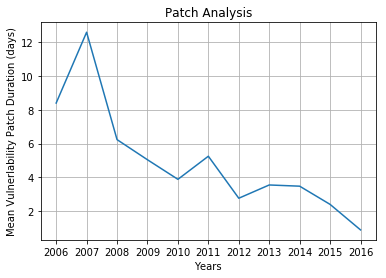

In [65]:
#Plot for mean lifetime of vulerabilities
#from pylab import *
temp = zip(years, mean_values)
temp = sorted(temp, key=itemgetter(0))

years, mean_values = zip(*temp)

x = years
y = mean_values
#plt.figure(figsize=(50,20))
plt.plot(x, y)
 
plt.xlabel('Years')
plt.ylabel('Mean Vulnerlability Patch Duration (days)')
plt.title('Patch Analysis')
plt.grid(True)
plt.xticks(x)
plt.show()